### This one is just a duplicate of MACrosses notebook. To be used once MACD ready for evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from bokeh.io import output_notebook
from importlib import reload
%matplotlib inline

import moving_average as ma
import utility

/home/ryohayama/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [5]:
if True:
    agg60 = pd.read_csv('fx_data/2009_early2018_USD_JPY_1h.csv')
    agg60['time'] = pd.to_datetime(agg60['time'], infer_datetime_format=True)
    agg60 = agg60.set_index('time')
    
    agg1d = pd.read_csv('fx_data/2009_early2018_USD_JPY_1D.csv')
    agg1d['time'] = pd.to_datetime(agg1d['time'], infer_datetime_format=True)
    agg1d = agg1d.set_index('time')

## Test crossings of SMA12 and SMA24 on 1hr data

In [6]:
collection1 = ma.MACollection(agg60['close'], type_='simple', periods=[12, 24])
collection1.getCrosses()
collection1.plot(plot_width=900)

Loading BokehJS ...

In [7]:
eval_periods = [1, 6, 12, 24, 72, 120]
res1 = utility.eval_metric_performance(collection1.data['close'], collection1.data['cross'], eval_periods)

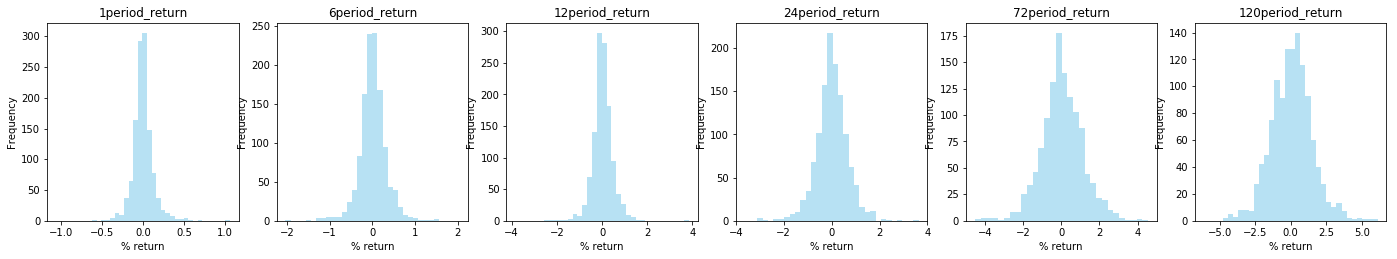

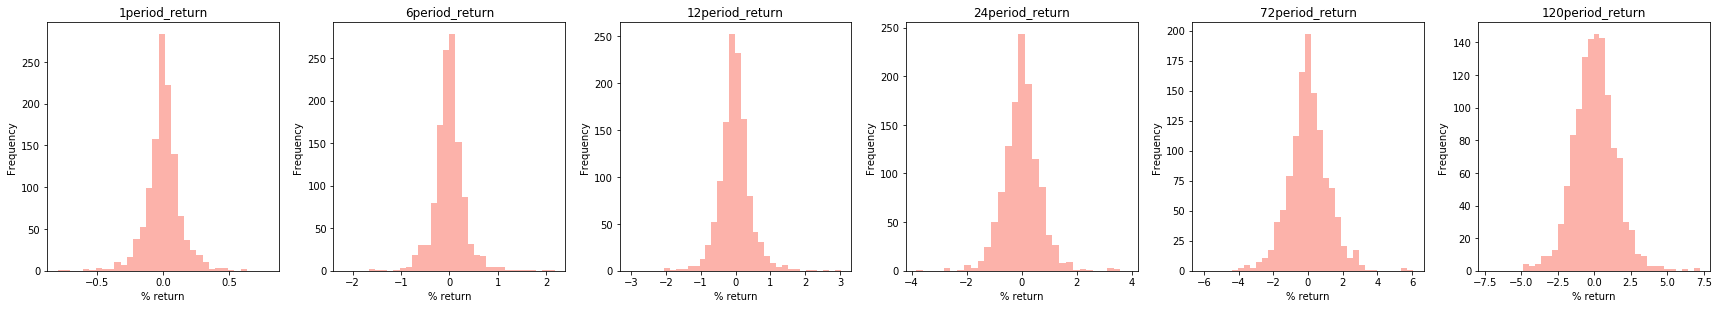

In [8]:
utility.plot_performance_mpl(res1, 'cross', bins=30, eval_periods=eval_periods)

## Test crossings of SMA10 and SMA25 on 1Day data

In [9]:
collection2 = ma.MACollection(agg1d['close'], type_='simple', periods=[10, 25])
collection2.getCrosses()
collection2.plot(plot_width=900)

Loading BokehJS ...

In [10]:
eval_periods = [1, 6, 12, 24, 72, 120]
res2 = utility.eval_metric_performance(collection2.data['close'], collection2.data['cross'], eval_periods)

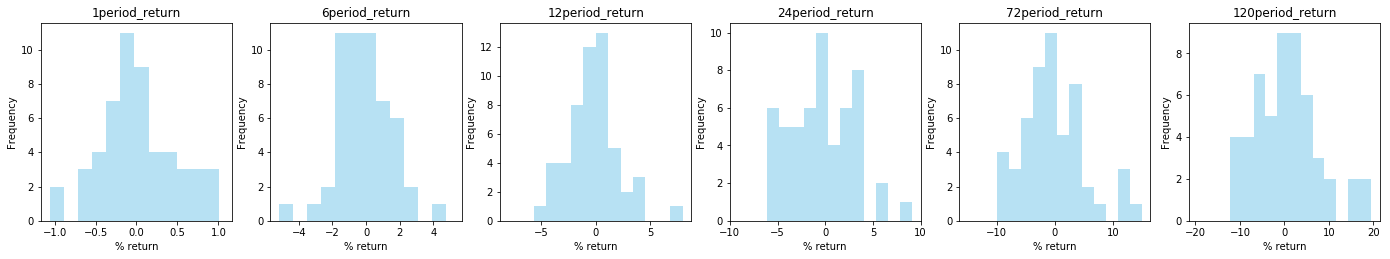

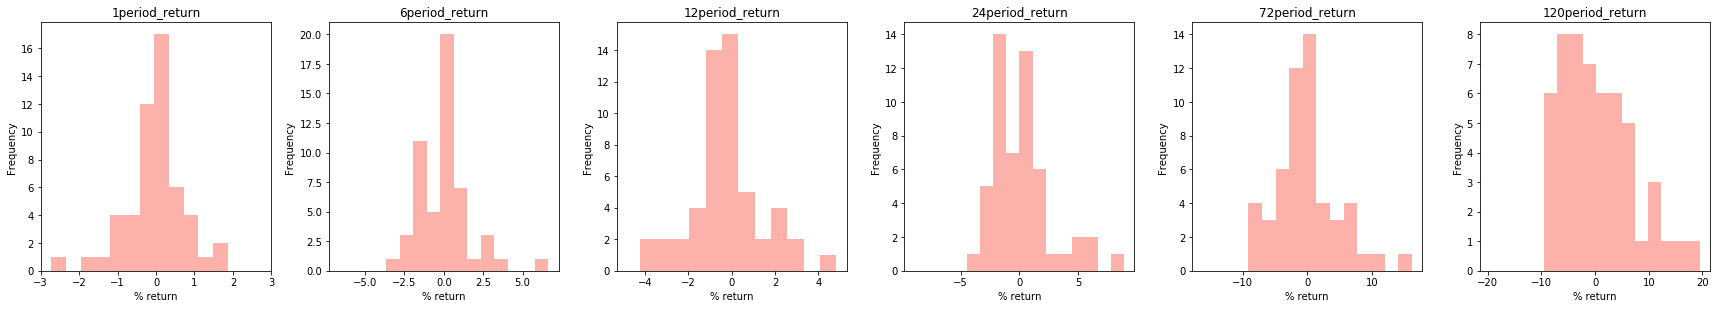

In [11]:
utility.plot_performance_mpl(res2, 'cross', bins=12, eval_periods=eval_periods)